In [1]:
from Bio import Entrez
Entrez.email = "joppich@compbio.cc"
Entrez.api_key = "9ba88cfa884a880b2653d22d48db18b35808"

In [2]:
handle = Entrez.esearch(db="gds", term="2011[Update Date]", retmode="xml", retmax=10)

In [3]:
records = Entrez.read(handle)
handle.close()

In [4]:
for record in records:
    print(record, records[record])

Count 177892
RetMax 10
RetStart 0
IdList ['3941', '3942', '3923', '3935', '3926', '3925', '3932', '3927', '3921', '3917']
TranslationSet []
TranslationStack [{'Term': '2011[Update Date]', 'Field': 'Update Date', 'Count': '177892', 'Explode': 'N'}, 'GROUP']
QueryTranslation 2011[Update Date]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
def makePlotForQuery(query, filename, startyear=2000, logy=False):
    years = []
    gdscount = []

    for year in range(startyear,2021):
        handle = Entrez.esearch(db="gds", term=query.format(year), retmode="xml", retmax=10)
        records = Entrez.read(handle)
        handle.close()

        print(year, records["Count"])

        years.append(year)
        gdscount.append(records["Count"])

    pdf= pd.DataFrame.from_dict({"years": [str(xe) for xe in years], "counts": [int(ye) for ye in gdscount]})
    chart = sns.barplot(data=pdf, x="years", y="counts", color="#73B1CF")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    if logy:
        chart.set_yscale("log")

    plt.xlabel("Publication Year")
    plt.ylabel("Number of GDS Datasets")

    for fname in filename:
        print("Saving", fname)
        plt.savefig(fname)
        
    plt.show()
    
    return years, gdscount

2000 12
2001 698
2002 2274
2003 8870
2004 19685
2005 38140
2006 49170
2007 82496
2008 89614
2009 117013
2010 133280
2011 172289
2012 187943
2013 213734
2014 263223
2015 277228
2016 363058
2017 410212
2018 516502
2019 559726
2020 774444
Saving geo_experiments_year.png
Saving geo_experiments_year.pdf


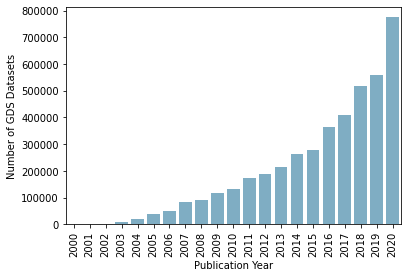

In [42]:
_,_ = makePlotForQuery("{}[Publication Date]", ["geo_experiments_year.png", "geo_experiments_year.pdf"])

2000 0
2001 17
2002 133
2003 735
2004 1171
2005 1775
2006 2220
2007 2842
2008 3095
2009 3574
2010 4255
2011 5180
2012 5554
2013 5815
2014 5779
2015 5537
2016 4927
2017 4310
2018 3744
2019 3061
2020 2771
Saving geo_experiments_array_year.png
Saving geo_experiments_array_year.pdf


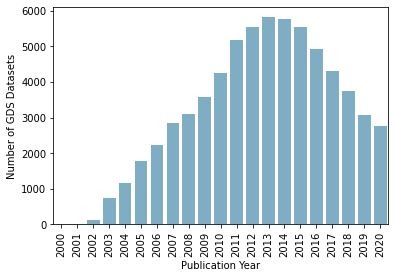

In [54]:
xarray,yarray = makePlotForQuery('{}[Publication Date] AND "expression profiling by array"[DataSet Type]', ["geo_experiments_array_year.png", "geo_experiments_array_year.pdf"])

2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 1
2007 1
2008 19
2009 35
2010 136
2011 309
2012 567
2013 1040
2014 1735
2015 2405
2016 4885
2017 5286
2018 6824
2019 8766
2020 11608
Saving geo_experiments_hts_year.png
Saving geo_experiments_hts_year.pdf


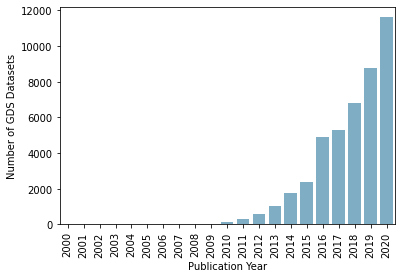

In [77]:
_,_ = makePlotForQuery('{}[Publication Date] AND =  "expression profiling by high throughput sequencing"[DataSet Type]', ["geo_experiments_hts_year.png", "geo_experiments_hts_year.pdf"])

2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 0
2015 5
2016 9
2017 24
2018 140
2019 263
2020 531
Saving geo_experiments_sc_year.png
Saving geo_experiments_sc_year.pdf


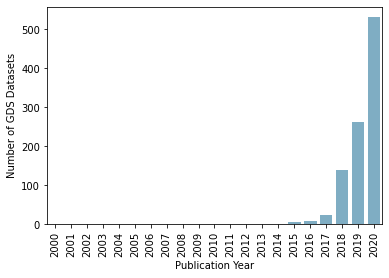

In [49]:
x,y = makePlotForQuery('{}[Publication Date] AND scRNA-seq AND "expression profiling by high throughput sequencing"[DataSet Type]', ["geo_experiments_sc_year.png", "geo_experiments_sc_year.pdf"])

2014 0
2015 5
2016 9
2017 24
2018 140
2019 263
2020 531
Saving geo_experiments_sc_year_2014.png
Saving geo_experiments_sc_year_2014.pdf


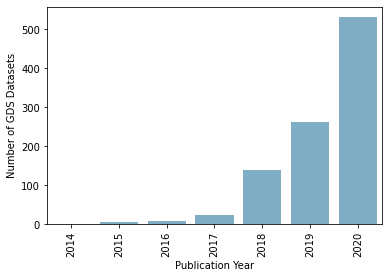

In [52]:
x,y = makePlotForQuery('{}[Publication Date] AND scRNA-seq AND "expression profiling by high throughput sequencing"[DataSet Type]', ["geo_experiments_sc_year_2014.png", "geo_experiments_sc_year_2014.pdf"], startyear=2014)

2000 0
2001 0
2002 0
2003 0
2004 0
2005 0
2006 1
2007 1
2008 19
2009 35
2010 136
2011 309
2012 567
2013 1040
2014 1735
2015 2405
2016 4885
2017 5286
2018 6824
2019 8766
2020 11608
Saving geo_experiments_rnaseq_year.png
Saving geo_experiments_rnaseq_year.pdf


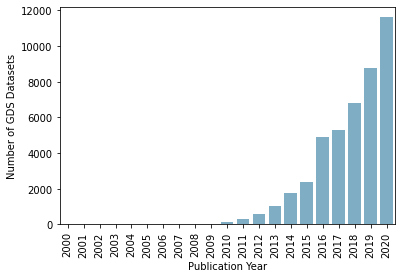

In [64]:
xrna,yrna = makePlotForQuery('{}[Publication Date] AND "expression profiling by high throughput sequencing"[DataSet Type]', ["geo_experiments_rnaseq_year.png", "geo_experiments_rnaseq_year.pdf"], startyear=2000)

In [72]:
pdf_seq = pd.DataFrame.from_dict({"years": [str(xe) for xe in xrna], "counts": [int(ye) for ye in yrna], "High-Throughput Method": ["Sequencing" for x in xrna]})
pdf_array = pd.DataFrame.from_dict({"years": [str(xe) for xe in xarray], "counts": [int(ye) for ye in yarray], "High-Throughput Method": ["Array" for x in xrna]})

pdf = pd.concat([pdf_seq, pdf_array])

In [73]:
pdf

,years,counts,High-Throughput Method
0,2000,0,Sequencing
1,2001,0,Sequencing
2,2002,0,Sequencing
3,2003,0,Sequencing
4,2004,0,Sequencing
5,2005,0,Sequencing
6,2006,1,Sequencing
7,2007,1,Sequencing
8,2008,19,Sequencing
9,2009,35,Sequencing


Saving geo_experiments_array_vs_sequencing.png
Saving geo_experiments_array_vs_sequencing.pdf


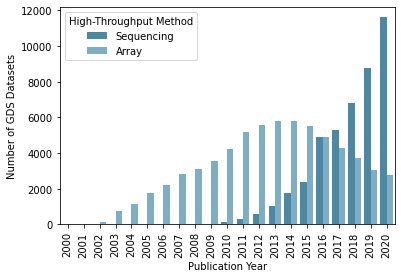

In [74]:
palette = {"Sequencing":"#3d8cb2",
           "Array":"#73B1CF"}

chart = sns.barplot(data=pdf, x="years", y="counts",hue="High-Throughput Method", palette=palette)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.xlabel("Publication Year")
plt.ylabel("Number of GDS Datasets")

for fname in ["geo_experiments_array_vs_sequencing.png", "geo_experiments_array_vs_sequencing.pdf"]:
    print("Saving", fname)
    plt.savefig(fname)
    
plt.show()